In [19]:
import torch
import matplotlib as plt

We will define `w` and `b` as the parameter of the linear line as `y = w * x + b`

In [20]:
w = torch.tensor(3.0, requires_grad=True) # initial with random number
b = torch.tensor(1.0, requires_grad=True) # initial with random number

### Define our perdiction model

In [21]:
def forward(x):
  y = w * x  + b
  
  return y

Make a prediction

In [22]:
x = torch.tensor(2.) # use x = 2.0, the expect value of y is 7 as 3 * 2 + 1 = 7 (w * x + b)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [23]:
x = torch.tensor([[4], [7], [3]])
forward(x)

tensor([[13.],
        [22.],
        [10.]], grad_fn=<AddBackward0>)

### Use PyTorch `Linear` Class

In [24]:
from torch.nn import Linear

torch.manual_seed(1)

model = Linear(in_features=1, out_features=1) # in features are the weight or also called parameters
print(model.bias)
print(model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True)
Parameter containing:
tensor([[0.5153]], requires_grad=True)


Make a prediction

In [25]:
x = torch.tensor([[2.], [3.3]]) # make a prediction for two numbers
y = model(x)
print(y)

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


Use custom module of Linear class

In [26]:
import torch.nn as nn

class LR(nn.Module):
  def __init__(self, in_size, out_size):
    super().__init__()

    self.linear = nn.Linear(in_size, out_size) 

  def forward(self, x):
    y = self.linear(x)

    return y

Check the model and print out the parameters

In [27]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


Make a prediction

In [28]:
x = torch.tensor([[1.], [2.]])
print(model.forward(x)) 

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


### Create the training set

Text(0, 0.5, 'Y')

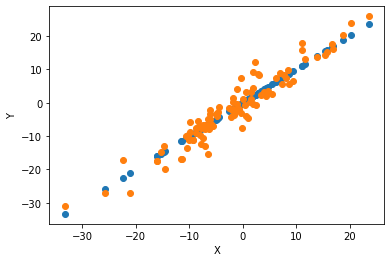

In [29]:
import matplotlib.pyplot as plt

torch.manual_seed(1)

X = torch.randn(100, 1) * 10 # create vector of dim(100, 1) which is normal distrubute
plt.plot(X, X, 'o')             # plot X,Y use 'o' point for each coordinate

Y = X + 3 * torch.randn(100, 1) # create Y with little nois
plt.plot(X, Y, 'o')             # plot the new X,Y 
plt.xlabel('X')
plt.ylabel('Y')

Draw the line of the prediction

In [30]:
import torch.nn as nn

class LR(nn.Module):
  def __init__(self, in_size, out_size):
    super().__init__()

    self.linear = nn.Linear(in_size, out_size) 

  def forward(self, x):
    y = self.linear(x)

    return y

  def get_parameters(self):
    (w, b) = self.parameters()

    return (w[0][0].item(), b[0].item())  

In [31]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.get_parameters()))

[0.5152631998062134, -0.44137823581695557]


In [32]:
import numpy as np

def plot_fit(model: LR, title: str):
  plt.title(title)

  w, b = model.get_parameters()
  print(w, b)
  x1 = np.array([-30, 30])

  y1 = w * x1 + b

  plt.plot(x1, y1, 'r')
  plt.scatter(X, Y)
  plt.show()

0.5152631998062134 -0.44137823581695557


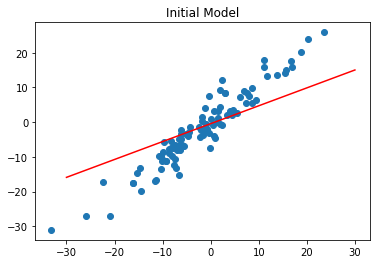

In [33]:
plot_fit(model, 'Initial Model')

### Training the Model

In [34]:
criterion = nn.MSELoss()  # define the lost fucntion
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # define the optimizer

In [35]:
epochs = 100
losses = []
y_train = Y

for i in range(epochs):  
  # y_pred = model.forward(X)
  y_pred = model(X)
  loss = criterion(y_pred, y_train)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 37.701290130615234
epoch: 1 loss: 36.5147819519043
epoch: 2 loss: 35.379066467285156
epoch: 3 loss: 34.291996002197266
epoch: 4 loss: 33.25142288208008
epoch: 5 loss: 32.25541687011719
epoch: 6 loss: 31.30202865600586
epoch: 7 loss: 30.389450073242188
epoch: 8 loss: 29.515932083129883
epoch: 9 loss: 28.679834365844727
epoch: 10 loss: 27.8795223236084
epoch: 11 loss: 27.113447189331055
epoch: 12 loss: 26.380172729492188
epoch: 13 loss: 25.678298950195312
epoch: 14 loss: 25.006479263305664
epoch: 15 loss: 24.3634090423584
epoch: 16 loss: 23.747861862182617
epoch: 17 loss: 23.158672332763672
epoch: 18 loss: 22.594703674316406
epoch: 19 loss: 22.054872512817383
epoch: 20 loss: 21.538145065307617
epoch: 21 loss: 21.043540954589844
epoch: 22 loss: 20.570106506347656
epoch: 23 loss: 20.116933822631836
epoch: 24 loss: 19.683155059814453
epoch: 25 loss: 19.267946243286133
epoch: 26 loss: 18.87051010131836
epoch: 27 loss: 18.49008560180664
epoch: 28 loss: 18.125940322875977
epoch:

Text(0.5, 0, 'epoch')

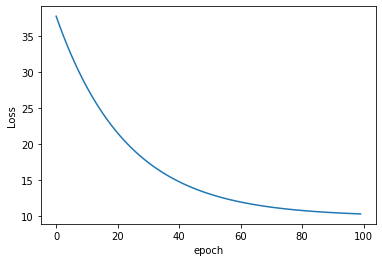

In [36]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')